**Part 1**

In [107]:
import pandas as pd

**Import the housing data as a data frame and ensure that the data is loaded properly.** 

In [108]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Drop the "Id" column and any features that are missing more than 40% of their values.**

In [109]:
df = df.drop(columns='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
# List of columns that have more than 40% of missing data
df.columns[df.isnull().mean() > 0.4]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [111]:
# Drops the identified columns
df = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**For numerical columns, fill in any missing data with the median value.**

In [112]:
# Identifies Numeric Columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [113]:
# Function that fills missing data with median
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

**For categorical columns, fill in any missing data with the most common value (mode).**

In [114]:
# Identifies Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [115]:
# Function that fills missing data with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode(), inplace=True)


**Convert the categorical columns to dummy variables.**

In [116]:
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


**Split the data into a training and test set, where the SalePrice column is the target.**

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# Separate the target from the features
feature = df.drop('SalePrice', axis=1)
target = df['SalePrice']

#Split the data into training and test
feature_train, feature_test, target_train, target_test = train_test_split(feature, target)


**Run a linear regression and report the R2-value and RMSE on the test set.**

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
# Creates linear regression
linear_regression = LinearRegression()

In [121]:
# Fits the model using test data
lr_model = linear_regression.fit(feature_test, target_test)

In [122]:
# Calculates R2
r_sqaured = lr_model.score(feature_test, target_test)
print("R2 Value is:", r_sqaured)

R2 Value is: 0.9692224429779468


In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
# Creates predictions
target_predicted = linear_regression.predict(feature_test)

In [125]:
# Calculates RSME
print("RSME is:", mean_squared_error(target_test, target_predicted, squared=False))

RSME is: 14373.486835823456


**Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).**

In [126]:
from sklearn.decomposition import PCA

In [127]:
# Sets PCA to retain 90% of variance
pca = PCA(n_components=0.90, whiten=True)

In [128]:
features_train_pca = pca.fit_transform(feature_train)

**How many features are in the PCA-transformed matrix?**

In [129]:
print("Original Number of Features:", feature_train.shape[1])
print("Reduced Number of Features:", features_train_pca.shape[1])

Original Number of Features: 270
Reduced Number of Features: 1


**Transform but DO NOT fit the test features with the same PCA.**

In [130]:
feature_test_pca = pca.transform(feature_test)

**Repeat step 7 with your PCA transformed data. Run a linear regression and report the R2-value and RMSE on the test set.**

In [131]:
# Fits model with PCA data
lr_pca_model = linear_regression.fit(feature_test_pca, target_test)

In [132]:
# Calculates R2 
r_sqaured_pca = lr_pca_model.score(feature_test_pca, target_test)
print("R2 Value is:", r_sqaured_pca)

R2 Value is: 0.08263362227132909


In [133]:
# Creates predictions
target_predicted_pca = linear_regression.predict(feature_test_pca)

In [134]:
# Calculates RSME
print("RSME is:", mean_squared_error(target_test, target_predicted_pca, squared=False))

RSME is: 78472.31641091306


**Take your original training features (from step 6) and apple a min-max scaler to them.**

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
# Creates MinMaxScaler
scaler = MinMaxScaler()

In [137]:
# Scales training features
scaled_feature_train = MinMaxScaler(feature_train)

**Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).**

In [138]:
from sklearn.feature_selection import VarianceThreshold

In [139]:
# Creates thresholder and sets variance threshold
thresholder = VarianceThreshold(threshold=.1)

In [140]:
# Finds the high variance features
features_high_variance = thresholder.fit_transform(feature_train)

**Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.**

In [176]:
# Transforms test data with pca
tranfrom_test = pca.transform(feature_test)

**Repeat step 7 with the high variance data.**

In [142]:
# Fits model with high variance data
lr_scaled_model = linear_regression.fit(features_high_variance, target_train)

In [143]:
# Calculates R2
r_sqaured_scaled = lr_scaled_model.score(features_high_variance, target_train)
print("R2 Value is:", r_sqaured_scaled)

R2 Value is: 0.8808640670770721


In [144]:
# Creates predictions
target_predicted_scaled = linear_regression.predict(features_high_variance)

In [145]:
# Calculates RSME
print("RSME is:", mean_squared_error(target_train, target_predicted_scaled, squared=False))

RSME is: 27108.606349630314


With each model created, the R2 value and RSME changed. R2 and RSME was the best when looking the split features and as we look at high variance data and PCA tranformed data the values change. 

**Part 2**

**Import the data as a data frame and ensure it is loaded correctly.**

In [146]:
mushroom_data = pd.read_csv('mushrooms.csv')

In [147]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Convert the categorical features (all of them) to dummy variables.**

In [148]:
# Creates 0, 1 for class column
mushroom_data['class_nbr'] = mushroom_data['class'].replace(to_replace=['p','e'], value=[0,1])

In [149]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_nbr
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,1


In [150]:
# Identifies Categorical Columns
categorical_mushroom_columns = mushroom_data.select_dtypes(include=['object']).columns
print(categorical_mushroom_columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [151]:
# Creates dummies
mushroom_data = pd.get_dummies(mushroom_data, columns=categorical_mushroom_columns)
mushroom_data.head()

,class_nbr,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


**Split the data into a training and test set.**

In [152]:
# Separate the target from the features
feature2 = mushroom_data.drop('class_nbr', axis=1)
target2 = mushroom_data['class_nbr']

#Split the data into training and test
feature_train2, feature_test2, target_train2, target_test2 = train_test_split(feature2, target2)


**Fit a decision tree classifier on the training set.**

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
# Creates Decision Tree Classifies
decisiontree = DecisionTreeClassifier()

In [155]:
# Fits model with training features
dt_model = decisiontree.fit(feature_train2, target_train2)

**Report the accuracy and create a confusion matrix for the model prediction on the test set.**

In [156]:
from sklearn import metrics

In [157]:
# Create predictions
prediction = decisiontree.predict(feature_test2)
# Calculate the accuracy
accuracy = 100*metrics.accuracy_score(prediction,target_test2)
# Display accuracy 
print('The accuracy of the Decision Tree is: ', round(accuracy,2), '%', sep = '')

The accuracy of the Decision Tree is: 100.0%


In [158]:
# Creates predictions
target_predicted = decisiontree.fit(feature_test2, target_test2).predict(feature_test2)

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [160]:
# Creates confusion matric using train set and predictions 
c_matrix = confusion_matrix(target_test2, target_predicted)

In [161]:
# Configures confusion matrix to be able to display
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)

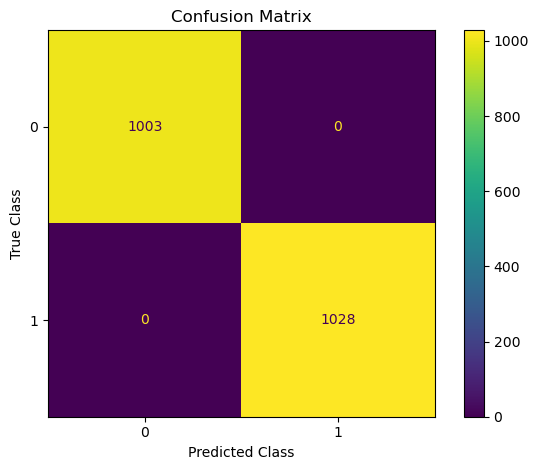

In [162]:
# Creates Plot
disp.plot()
# Creates title
plt.title("Confusion Matrix"), plt.tight_layout()
# Creates y and x labels 
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
# Displays plot
plt.show()

**Create a visualization of the decision tree.**

In [163]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'class_e <= 0.5\ngini = 0.5\nsamples = 2031\nvalue = [1003, 1028]\nclass = poisonous'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1028\nvalue = [0, 1028]\nclass = poisonous'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1003\nvalue = [1003, 0]\nclass = edible')]

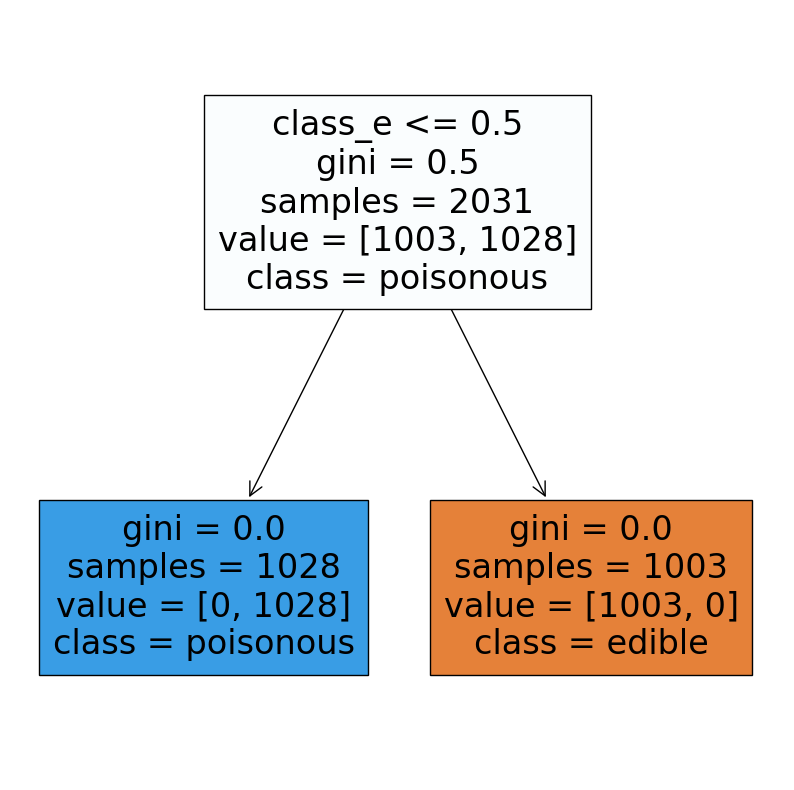

In [164]:
# Creates plot tree
plt.figure(figsize=(10,10))
plot_tree(decisiontree, feature_names=mushroom_data.columns, class_names=['edible', 'poisonous'], filled=True)

**Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).**

In [165]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [166]:
# Set chi select to get the five best fetures
chi2_selector = SelectKBest(chi2, k=5)

In [167]:
# Fits and transforms with the best five
features_kbest = chi2_selector.fit_transform(feature_train2, target_train2)

**Which five features were selected in step 7? Hint: Use the get_support function.**

In [168]:
# Gets the five features
five_best = feature_train2.columns[chi2_selector.get_support()]
print("Five Features:", five_best)

Five Features: Index(['class_e', 'class_p', 'odor_f', 'odor_n', 'stalk-surface-above-ring_k'], dtype='object')


**Repeat steps 4 and 5 with the five best features selected in step 7.**

Fit a decision tree classifier on the training set.
Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [169]:
# Creates features based on five features
feature_train2_best = feature_train2[five_best]
feature_test2_best = feature_test2[five_best]

In [170]:
# Fits model with the five features
dt_kbest_model = decisiontree.fit(feature_train2_best, target_train2)

In [171]:
# Create predictions
prediction2 = decisiontree.predict(feature_test2_best)
# Calculate the accuracy
accuracy2 = 100*metrics.accuracy_score(prediction2,target_test2)
# Display accuracy 
print('The accuracy of the Decision Tree is: ', round(accuracy2,2), '%', sep = '')

The accuracy of the Decision Tree is: 100.0%


In [172]:
# Creates predictions
target_predicted2 = decisiontree.fit(feature_test2_best, target_test2).predict(feature_test2_best)

In [173]:
# Creates confusion matric using train set and predictions 
c_matrix2 = confusion_matrix(target_test2, target_predicted2)

In [174]:
# Configures confusion matrix to be able to display
disp2 = ConfusionMatrixDisplay(confusion_matrix=c_matrix2)

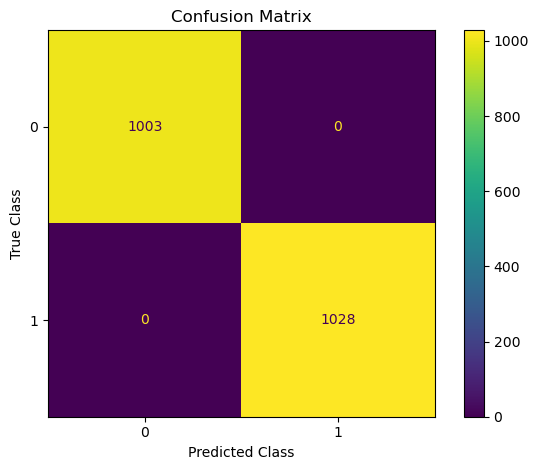

In [175]:
# Creates Plot
disp2.plot()
# Creates title
plt.title("Confusion Matrix"), plt.tight_layout()
# Creates y and x labels 
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
# Displays plot
plt.show()

After running through the five best and all of the data, the confusion matrices were the same. The accuarcy was also the same for both sets. It seems like the five features have the most influence on the data. 